<a href="https://colab.research.google.com/github/BartoszJanJerzy/data-science-bootcamp/blob/master/13_por%C3%B3wnanie_PANDAS_do_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [13]:
url = 'http://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/online_retail.xlsx'
retail_raw = pd.read_excel(url)
retail_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
# tworzenie kopii
retail = retail_raw.copy()

## Przygotowanie danych

In [8]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [40]:
# radykalne usuwanie braków danych
# najpeirw zobaczmy ile ich jest
print('>>>Before dropna()\n',retail.isnull().sum())
print()

# a potem usuńmy wiersze z jakimkolwiek brakiem
retail.dropna(inplace=True)
print('>>>After dropna()\n',retail.isnull().sum())

>>>Before dropna()
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

>>>After dropna()
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [20]:
# szybki rzut oka na wartości liczbowe
retail.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [41]:
# część jest błędna -> 'Quantity' nie może być ujemne
# wycinanie takich danych
retail = retail[retail.Quantity >= 0]

retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [42]:
# konwersja CustomerID z float na str
retail.CustomerID = retail.CustomerID.apply(lambda x: str(int(x)))
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


## Porównanie do SQL

In [25]:
# SELECT * FROM retail;
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [27]:
# SELECT Quantity, UnitPrice, CustomerID FROM retail
retail[['Quantity','UnitPrice','CustomerID']]

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
...,...,...,...
541904,12,0.85,12680
541905,6,2.10,12680
541906,4,4.15,12680
541907,4,4.15,12680


In [28]:
# SELECT Quantity, UnitPrice, CustomerID FROM retail LIMIT 10
retail[['Quantity','UnitPrice','CustomerID']].head(10)
# lub retail[['Quantity','UnitPrice','CustomerID']][:10]

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
5,2,7.65,17850
6,6,4.25,17850
7,6,1.85,17850
8,6,1.85,17850
9,32,1.69,13047


In [43]:
# SELECT * FROM retail WHERE CustomerID='17850'
filter = retail.CustomerID == '17850'
retail[filter]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
4540,536790,22752,SET 7 BABUSHKA NESTING BOXES,4,2010-12-02 15:26:00,7.65,17850,United Kingdom
4541,536790,22803,IVORY EMBROIDERED QUILT,3,2010-12-02 15:26:00,35.75,17850,United Kingdom
4542,536790,21730,GLASS STAR FROSTED T-LIGHT HOLDER,12,2010-12-02 15:26:00,4.25,17850,United Kingdom
4543,536791,22632,HAND WARMER RED POLKA DOT,12,2010-12-02 15:27:00,1.85,17850,United Kingdom


In [45]:
# SELECT * FROM retail WHERE CustomerID='17850' and UnitPrice > 5;
filter1 = retail.CustomerID == '17850'
filter2 = retail.UnitPrice > 5
retail[filter1 & filter2].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
58,536373,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:02:00,6.95,17850,United Kingdom
63,536373,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:02:00,7.65,17850,United Kingdom
75,536375,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:32:00,6.95,17850,United Kingdom
80,536375,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:32:00,7.65,17850,United Kingdom


In [46]:
# SELECT * FROM retail WHERE InvoiceNo is not null;
filter = retail.InvoiceNo.notnull()
retail[filter]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [47]:
# SELECT CustomerID, count(*) FROM retail GROUP BY CustomerID
retail.groupby('CustomerID').size()

CustomerID
12346      1
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     12
18283    756
18287     70
Length: 4339, dtype: int64

In [49]:
# dodawanie kolumny przychód
retail['Revenue'] = retail.Quantity * retail.UnitPrice
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [51]:
# średni przychód na sprzedawcę
retail.groupby('CustomerID').aggregate({'Revenue':np.mean, 'CustomerID': np.size}).rename(columns={'Revenue':'RevenueAvarage','CustomerID':'CustomerIDCount'})

,RevenueAvarage,CustomerIDCount
CustomerID,,
12346,77183.600000,1
12347,23.681319,182
12348,57.975484,31
12349,24.076027,73
12350,19.670588,17
...,...,...
18280,18.060000,10
18281,11.545714,7
18282,14.837500,12


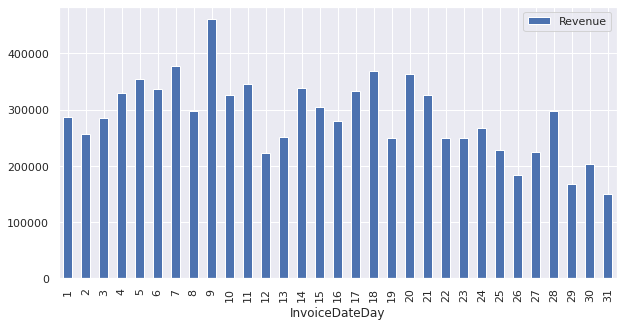

In [62]:
# SELECT InvoiceDataDay, sum(Revenue) FROM retail GROUP BY InvoiceDateDay

# tworzenie nowej kolumny z dniem
retail['InvoiceDateDay'] = retail.InvoiceDate.dt.day

# oblciznaie sumy przychodó z danego dnia
results = retail.groupby('InvoiceDateDay').aggregate({'Revenue':np.sum})

# wykresik
import seaborn as sns
sns.set()
_ = results.plot(kind='bar', figsize=(10,5))

In [63]:
# SELECT * FROM retail ORDER BY Quantity DESC LIMIT 5;
retail.nlargest(n=5,columns='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,9
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,18
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.0,25
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,1008.0,27
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,3096.0,27


In [65]:
# SELECT * FROM retail ORDER BY Quantity LIMIT 5;
retail.nsmallest(n=5,columns='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom,1.25,1
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85,1
115,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom,2.55,1
118,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311,United Kingdom,1.95,1
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311,United Kingdom,2.95,1
